# STA 141B Lecture 12

The class website is <https://github.com/2019-winter-ucdavis-sta141b/notes>

### Announcements

### Topics

* Natural Language Processing

### Datasets

### References

* [Natural Language Processing with Python][nlpp], chapters 1-3. Beware: the print version is for Python 2.
* [Applied Text Analysis with Python][atap], chapters 1, 3, 4
* [Scikit-Learn Documentation][skl], especially the section about [Text Feature Extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)

[PDSH]: https://jakevdp.github.io/PythonDataScienceHandbook/
[ProGit]: https://git-scm.com/book/
[nlpp]: https://www.nltk.org/book/
[atap]: https://search.library.ucdavis.edu/primo-explore/fulldisplay?docid=01UCD_ALMA51320822340003126&context=L&vid=01UCD_V1&search_scope=everything_scope&tab=default_tab&lang=en_US
[skl]: https://scikit-learn.org/stable/documentation.html

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
import numpy as np
import pandas as pd

import nltk
import nltk.corpus

# nltk.download("gutenberg")
# nltk.download("punkt")

In [5]:
alice = nltk.corpus.gutenberg.raw("carroll-alice.txt")
alice[:100]

"[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was"

In [6]:
nltk.word_tokenize(alice)

['[',
 'Alice',
 "'s",
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865',
 ']',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'the',
 'Rabbit-Hole',
 'Alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 ',',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 ':',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading',
 ',',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'conversations',
 'in',
 'it',
 ',',
 "'and",
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 ',',
 "'",
 'thought',
 'Alice',
 "'without",
 'pictures',
 'or',
 'conversation',
 '?',
 "'",
 'So',
 'she',
 'was',
 'considering',
 'in',
 'her',
 'own',
 'mind',
 '(',
 'as',
 'well',
 'as',
 'she',
 'could',
 ',',
 'for',
 'the',
 'hot',
 'day',
 'made',
 'her',
 'feel',
 'very',
 'sleepy',
 'and',
 'stupid',
 ')',
 ',',
 'whether',
 'the',
 'pleasure',
 'o

## Strings, String Methods, and Regular Expressions

How does word tokenization actually work?

The simplest strategy is to split at whitespace. You can do this with Python's built-in string methods:

In [7]:
alice.split()

["[Alice's",
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865]',
 'CHAPTER',
 'I.',
 'Down',
 'the',
 'Rabbit-Hole',
 'Alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank,',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do:',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading,',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'conversations',
 'in',
 'it,',
 "'and",
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 "book,'",
 'thought',
 'Alice',
 "'without",
 'pictures',
 'or',
 "conversation?'",
 'So',
 'she',
 'was',
 'considering',
 'in',
 'her',
 'own',
 'mind',
 '(as',
 'well',
 'as',
 'she',
 'could,',
 'for',
 'the',
 'hot',
 'day',
 'made',
 'her',
 'feel',
 'very',
 'sleepy',
 'and',
 'stupid),',
 'whether',
 'the',
 'pleasure',
 'of',
 'making',
 'a',
 'daisy-chain',
 'would',
 'be',
 'worth',
 'the',
 'troubl

Splitting on whitespace doesn't handle punctuation. You can use regular expressions to split on more complex patterns. Python's built-in __re__ module provides regular expression functions.

In [8]:
import re

re.split("[ ,.:;!']", alice)

['[Alice',
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865]\n\nCHAPTER',
 'I',
 '',
 'Down',
 'the',
 'Rabbit-Hole\n\nAlice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the\nbank',
 '',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 '',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the\nbook',
 'her',
 'sister',
 'was',
 'reading',
 '',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'conversations',
 'in\nit',
 '',
 '',
 'and',
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 '',
 '',
 'thought',
 'Alice',
 '',
 'without',
 'pictures',
 'or\nconversation?',
 '\n\nSo',
 'she',
 'was',
 'considering',
 'in',
 'her',
 'own',
 'mind',
 '(as',
 'well',
 'as',
 'she',
 'could',
 '',
 'for',
 'the\nhot',
 'day',
 'made',
 'her',
 'feel',
 'very',
 'sleepy',
 'and',
 'stupid)',
 '',
 'whether',
 'the',
 'pleasure\nof',
 'making',
 'a',
 'daisy-chain',
 'would',
 '

What if we also want to split at newlines?

### Escape Sequences and Raw Strings

In Python strings, backslash `\` marks the beginning of an _escape sequence_. Escape sequences are special codes for writing characters that you can't otherwise type. For example, `\n` is a new line character and `\t` is a tab character.

Since `\` has a special meaning in strings, to write a literal `\` you must use the escape sequence `\\`.

You can see the actual characters in a string by printing the string:

In [9]:
print("\\")

\


The regular expression language is independent of Python and also uses backslash `\` to mark the beginning of an escape sequence. Regex escape sequences disable special behavior for characters. For example, `.` matches any character, but `\.` only matches a literal `.`.

As a result, writing a regular expression in an ordinary Python string is awkward. For example, to match a literal `\`, we need to write `\\` in regular expressions, which is `\\\\` in an ordinary Python string.

Python provides _raw strings_, where `\` has no special meaning for Python, to help solve this problem. You can create a raw string by putting an `r` before the starting quote:

In [10]:
print("\\\\")

\\


In [12]:
print(r"\ ")

\ 


In [ ]:
"[\\]{3}"

In [13]:
r"\"

SyntaxError: EOL while scanning string literal (<ipython-input-13-be4b0bde9d98>, line 1)

Even raw strings can't end in `\`; this is a limitation of the Python parser.

### More Regular Expressions

Now we can write a better regular expression to split with:

In [18]:
re.split(r"[ ,.:;!'\n\]\[]", alice)

['',
 'Alice',
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865',
 '',
 '',
 'CHAPTER',
 'I',
 '',
 'Down',
 'the',
 'Rabbit-Hole',
 '',
 'Alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 '',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 '',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading',
 '',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'conversations',
 'in',
 'it',
 '',
 '',
 'and',
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 '',
 '',
 'thought',
 'Alice',
 '',
 'without',
 'pictures',
 'or',
 'conversation?',
 '',
 '',
 'So',
 'she',
 'was',
 'considering',
 'in',
 'her',
 'own',
 'mind',
 '(as',
 'well',
 'as',
 'she',
 'could',
 '',
 'for',
 'the',
 'hot',
 'day',
 'made',
 'her',
 'feel',
 'very',
 'sleepy',
 'and',
 'stupid)',
 '',
 'whether',
 'the',
 'pleasure',
 'of',
 

The regular expressions language includes _character classes_ that describe common sets of characters. The whitespace class `\s` and the word class `\w` are useful here. So to split on any whitespace character:

In [19]:
re.split(r"\s", alice) # normally we'd use alice.split() instead

["[Alice's",
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865]',
 '',
 'CHAPTER',
 'I.',
 'Down',
 'the',
 'Rabbit-Hole',
 '',
 'Alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank,',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do:',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading,',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'conversations',
 'in',
 'it,',
 "'and",
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 "book,'",
 'thought',
 'Alice',
 "'without",
 'pictures',
 'or',
 "conversation?'",
 '',
 'So',
 'she',
 'was',
 'considering',
 'in',
 'her',
 'own',
 'mind',
 '(as',
 'well',
 'as',
 'she',
 'could,',
 'for',
 'the',
 'hot',
 'day',
 'made',
 'her',
 'feel',
 'very',
 'sleepy',
 'and',
 'stupid),',
 'whether',
 'the',
 'pleasure',
 'of',
 'making',
 'a',
 'daisy-chain',
 'would',
 'be',
 'worth',
 

Capitalizing a character classes inverts the meaning, so to split on all non-word characters:

In [24]:
re.split(r"\W+", "the..dog")

['the', 'dog']

In [21]:
re.split(r"\W+", alice)

['',
 'Alice',
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865',
 'CHAPTER',
 'I',
 'Down',
 'the',
 'Rabbit',
 'Hole',
 'Alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'conversations',
 'in',
 'it',
 'and',
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 'thought',
 'Alice',
 'without',
 'pictures',
 'or',
 'conversation',
 'So',
 'she',
 'was',
 'considering',
 'in',
 'her',
 'own',
 'mind',
 'as',
 'well',
 'as',
 'she',
 'could',
 'for',
 'the',
 'hot',
 'day',
 'made',
 'her',
 'feel',
 'very',
 'sleepy',
 'and',
 'stupid',
 'whether',
 'the',
 'pleasure',
 'of',
 'making',
 'a',
 'daisy',
 'chain',
 'would',
 'be',
 'worth',
 'the',
 'troubl

Rather than splitting the text, you can also approach the problem from the perspective of extracting tokens. The `findall()` function returns all matches for a regular expression:

In [25]:
re.findall(r"\w+", "The dog barked!")

['The', 'dog', 'barked']

In [29]:
print("\w") # \w is not a special python escape sequence, so it passes through

\w


In [34]:
re.findall(r"(?:\w+('|\w)*)+", "The dog's toy barked!")

['The', "dog's", 'toy', 'barked']

In [30]:

re.findall(r"(?:\w|')+", alice)

["Alice's",
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865',
 'CHAPTER',
 'I',
 'Down',
 'the',
 'Rabbit',
 'Hole',
 'Alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'conversations',
 'in',
 'it',
 "'and",
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 "'",
 'thought',
 'Alice',
 "'without",
 'pictures',
 'or',
 'conversation',
 "'",
 'So',
 'she',
 'was',
 'considering',
 'in',
 'her',
 'own',
 'mind',
 'as',
 'well',
 'as',
 'she',
 'could',
 'for',
 'the',
 'hot',
 'day',
 'made',
 'her',
 'feel',
 'very',
 'sleepy',
 'and',
 'stupid',
 'whether',
 'the',
 'pleasure',
 'of',
 'making',
 'a',
 'daisy',
 'chain',
 'would',
 'be',
 'worth',
 'the',
 't

Tokenizing natural languages is a difficult problem. Some tokenizers work better for certain kinds of documents than others.

Before building your own tokenizer, try the tokenizers included with __nltk__, in the `nltk.tokenize` submodule.

## Standardizing Text

We standardize numerical data in order to make fair comparisons, comparisons that are not influenced by the location and scale of the data. Similarly, you can standardize text (tokens) to make sure comparisons are fair and accurate.

For example, `"Cat"` and `"cat"` are the same word even though they're different tokens. Converting all characters to lowercase is one way to standardize a document.

Some common standardization techniques for text are:

* Lowercasing
* Stemming: Use patterns to remove prefixes and suffixes from words.
* Lemmatiziation: Look up each token in a dictionary and replace it with a root word. Similar to stemming, but more accurate.
* Stopword Removal: Remove tokens that don't contribute meaning. For example, "the" is meaningless on its own.
* Identifying Outliers: Identify and possibly remove non-standard "words" like numbers, mispellings, code, etc...

How and whether you should standardize a document or corpus depends on what kind of analysis you want to do. There is no formula; you must think carefully and experiment to determine which standardization techniques work best for your problem.

### Lowercasing

You can use Python's string methods for simple text transformations.

In [37]:
alice.lower()[:100]

"[alice's adventures in wonderland by lewis carroll 1865]\n\nchapter i. down the rabbit-hole\n\nalice was"

In [39]:
words = nltk.word_tokenize(alice)
words[:10]
lower = [w.lower() for w in words]
lower[:10]

['[',
 'alice',
 "'s",
 'adventures',
 'in',
 'wonderland',
 'by',
 'lewis',
 'carroll',
 '1865']

### Stemming

_Stemming_ runs an algorithm on each token to remove affixes (prefixes and suffixes). The result is called a _stem_.

Stemming is useful if you want to ignore affixes.

For example, most English verbs use suffixes to mark the tense. We write "They fish" (present) and "They fished" (past). Without any standardization, the tokens "fish" and "fished" would be treated as separate words. Stemming converts both tokens to the common stem "fish":

In [43]:
stemmer = nltk.PorterStemmer()
[stemmer.stem(w) for w in words]

['[',
 'alic',
 "'s",
 'adventur',
 'in',
 'wonderland',
 'by',
 'lewi',
 'carrol',
 '1865',
 ']',
 'chapter',
 'I',
 '.',
 'down',
 'the',
 'rabbit-hol',
 'alic',
 'wa',
 'begin',
 'to',
 'get',
 'veri',
 'tire',
 'of',
 'sit',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 ',',
 'and',
 'of',
 'have',
 'noth',
 'to',
 'do',
 ':',
 'onc',
 'or',
 'twice',
 'she',
 'had',
 'peep',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'wa',
 'read',
 ',',
 'but',
 'it',
 'had',
 'no',
 'pictur',
 'or',
 'convers',
 'in',
 'it',
 ',',
 "'and",
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 ',',
 "'",
 'thought',
 'alic',
 "'without",
 'pictur',
 'or',
 'convers',
 '?',
 "'",
 'So',
 'she',
 'wa',
 'consid',
 'in',
 'her',
 'own',
 'mind',
 '(',
 'as',
 'well',
 'as',
 'she',
 'could',
 ',',
 'for',
 'the',
 'hot',
 'day',
 'made',
 'her',
 'feel',
 'veri',
 'sleepi',
 'and',
 'stupid',
 ')',
 ',',
 'whether',
 'the',
 'pleasur',
 'of',
 'make',
 'a',
 'daisy-chain',
 'would',
 'be',


In [45]:
stemmer.stem("adventured")

'adventur'

Stemmers use a sequence of rules to determine the stem for each token, but natural languages are full of special cases and exceptions. So as you can see in the example above, some stems are not words ("alic"), and sometimes tokens that seem like they should have the same stem don't.

Several different stemmers are provided in the `nltk.stem` submodule.

### Lemmatization

_Lemmatization_ looks up each token in a dictionary to find a root word, or _lemma_.

Lemmatization serves the same purpose as stemming. Lemmatization is more accurate, but requires a dictionary and usually takes longer.

In [46]:
lemmatizer = nltk.WordNetLemmatizer()

In [48]:
lemmatizer.lemmatize("adventured", "v")

'adventure'

The WordNet lemmatizer requires part of speech information in order to lemmatize words. You can get approximate part of speech information with __nltk__'s `pos_tag()` function.

In [50]:
nltk.pos_tag(["adventured"])

[('adventured', 'VBN')]

These are [Brown POS tags][brown], but the lemmatizer uses WordNet POS tags. You can use this function to convert the tags:

[brown]: https://en.wikipedia.org/wiki/Brown_Corpus#Part-of-speech_tags_used

In [51]:
from nltk.corpus import wordnet

def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN)

In [57]:
dog_words = nltk.word_tokenize("The quick brown fox jumped over the lazy dog.")
dog_tags = nltk.pos_tag(dog_words)
[lemmatizer.lemmatize(w, wordnet_pos(t)) for (w, t) in dog_tags]

['The', 'quick', 'brown', 'fox', 'jump', 'over', 'the', 'lazy', 'dog', '.']

In [59]:
alice_tags = nltk.pos_tag(words)
[lemmatizer.lemmatize(w, wordnet_pos(t)) for (w, t) in alice_tags]

['[',
 'Alice',
 "'s",
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865',
 ']',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'the',
 'Rabbit-Hole',
 'Alice',
 'be',
 'begin',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sit',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 ',',
 'and',
 'of',
 'have',
 'nothing',
 'to',
 'do',
 ':',
 'once',
 'or',
 'twice',
 'she',
 'have',
 'peep',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'be',
 'read',
 ',',
 'but',
 'it',
 'have',
 'no',
 'picture',
 'or',
 'conversation',
 'in',
 'it',
 ',',
 "'and",
 'what',
 'be',
 'the',
 'use',
 'of',
 'a',
 'book',
 ',',
 "'",
 'thought',
 'Alice',
 "'without",
 'picture',
 'or',
 'conversation',
 '?',
 "'",
 'So',
 'she',
 'be',
 'consider',
 'in',
 'her',
 'own',
 'mind',
 '(',
 'as',
 'well',
 'a',
 'she',
 'could',
 ',',
 'for',
 'the',
 'hot',
 'day',
 'make',
 'her',
 'feel',
 'very',
 'sleepy',
 'and',
 'stupid',
 ')',
 ',',
 'whether',
 'the',
 'pleasure',
 'of',
 'make',
 'a',
 'da

The `nltk.stem` submodule also provides several different lemmatizers.

### Stopword Removal

_Stopwords_ are words that appear frequently but don't add meaning.

In English, "the", "a", and "at" are examples. However, exactly which words are stopwords depends on your analysis. Words that are meaningless in one analysis might be very important in others.

You can filter out stopwords with a list comprehension:

In [62]:
stopwords = ["the", "a", "and", "or", "in"]
[w for w in words if w not in stopwords]

['[',
 'Alice',
 "'s",
 'Adventures',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865',
 ']',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'Rabbit-Hole',
 'Alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'bank',
 ',',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 ':',
 'once',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'book',
 'her',
 'sister',
 'was',
 'reading',
 ',',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'conversations',
 'it',
 ',',
 "'and",
 'what',
 'is',
 'use',
 'of',
 'book',
 ',',
 "'",
 'thought',
 'Alice',
 "'without",
 'pictures',
 'conversation',
 '?',
 "'",
 'So',
 'she',
 'was',
 'considering',
 'her',
 'own',
 'mind',
 '(',
 'as',
 'well',
 'as',
 'she',
 'could',
 ',',
 'for',
 'hot',
 'day',
 'made',
 'her',
 'feel',
 'very',
 'sleepy',
 'stupid',
 ')',
 ',',
 'whether',
 'pleasure',
 'of',
 'making',
 'daisy-chain',
 'would',
 'be',
 'worth',
 'trouble',
 'of',
 'getting',
 'up',
 'picking',
 'da

__nltk__ also provides a stopwords corpus that contains common stopwords for several languages.

In [63]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/nick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
stopwords = nltk.corpus.stopwords.words("english")
[w for w in words if w not in stopwords]

['[',
 'Alice',
 "'s",
 'Adventures',
 'Wonderland',
 'Lewis',
 'Carroll',
 '1865',
 ']',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'Rabbit-Hole',
 'Alice',
 'beginning',
 'get',
 'tired',
 'sitting',
 'sister',
 'bank',
 ',',
 'nothing',
 ':',
 'twice',
 'peeped',
 'book',
 'sister',
 'reading',
 ',',
 'pictures',
 'conversations',
 ',',
 "'and",
 'use',
 'book',
 ',',
 "'",
 'thought',
 'Alice',
 "'without",
 'pictures',
 'conversation',
 '?',
 "'",
 'So',
 'considering',
 'mind',
 '(',
 'well',
 'could',
 ',',
 'hot',
 'day',
 'made',
 'feel',
 'sleepy',
 'stupid',
 ')',
 ',',
 'whether',
 'pleasure',
 'making',
 'daisy-chain',
 'would',
 'worth',
 'trouble',
 'getting',
 'picking',
 'daisies',
 ',',
 'suddenly',
 'White',
 'Rabbit',
 'pink',
 'eyes',
 'ran',
 'close',
 '.',
 'There',
 'nothing',
 'VERY',
 'remarkable',
 ';',
 'Alice',
 'think',
 'VERY',
 'much',
 'way',
 'hear',
 'Rabbit',
 'say',
 ',',
 "'Oh",
 'dear',
 '!',
 'Oh',
 'dear',
 '!',
 'I',
 'shall',
 'late',
 '!',
 "'",
 '(',

## Exploring Documents

A simple way to explore a document is by looking at frequency distributions for tokens.

You can use the `FreqDist()` function to construct a frequency distributions from a list of tokens.

In [87]:
words = nltk.word_tokenize(alice.lower())
words = [w for w in words]
words[:10]

['[',
 'alice',
 "'s",
 'adventures',
 'in',
 'wonderland',
 'by',
 'lewis',
 'carroll',
 '1865']

In [88]:
fq = nltk.FreqDist(w for w in words if w.isalnum())

Frequency distribution objects have a few methods to provide summary information.

The `.most_common()` method returns the most common tokens and their frequencies:

In [82]:
fq.most_common(25)

[('said', 462),
 ('alice', 396),
 ('little', 128),
 ('one', 99),
 ('would', 90),
 ('know', 88),
 ('could', 86),
 ('like', 85),
 ('went', 83),
 ('queen', 75),
 ('thought', 74),
 ('time', 68),
 ('see', 67),
 ('king', 62),
 ('began', 58),
 ('turtle', 58),
 ('hatter', 56),
 ('mock', 56),
 ('quite', 55),
 ('gryphon', 54),
 ('think', 53),
 ('way', 53),
 ('much', 51),
 ('say', 51),
 ('first', 50)]

A _hapax_ is a token that only occurs once within a document. The `.hapaxes()` method returns the hapaxes:

In [80]:
fq.hapaxes()

['conversations',
 "'without",
 'daisy-chain',
 'wondered',
 'actually',
 'fortunately',
 'stopping',
 'book-shelves',
 'labelled',
 'marmalade',
 'disappointment',
 'schoolroom',
 'practice',
 'downward',
 'antipathies',
 'australia',
 'curtseying',
 'ignorant',
 'to-night',
 'overhead',
 'hurrying',
 'rat-hole',
 'loveliest',
 'telescopes',
 'histories',
 'disagree',
 'cherry-tart',
 'pine-apple',
 'buttered',
 'slippery',
 'pretending',
 'respectable',
 'currants',
 "'curiouser",
 'curiouser',
 'good-bye',
 'stockings',
 'christmas',
 'planning',
 'hearthrug',
 'hopeless',
 'shedding',
 'reaching',
 'returning',
 'splendidly',
 'desperate',
 'skurried',
 'darkness',
 'thirteen',
 'multiplication',
 'geography',
 'crocodile',
 'cheerfully',
 'existence',
 'machines',
 'punished',
 'hippopotamus',
 'inquisitively',
 'lesson-book',
 'passionate',
 'soothing',
 'bristling',
 'bright-eyed',
 'commotion',
 'queer-looking',
 'draggled',
 'feathers',
 'clinging',
 'dripping',
 'consultation

The `.plot()` method displays a plot of word frequencies, sorted from most to least frequent word.

The first parameter controls how many words to display. The second parameter controls whether the plot is cummulative.

In [84]:
%matplotlib inline

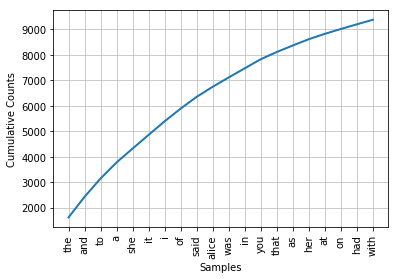

In [90]:
fq.plot(20, cumulative = True)

In [91]:
len(words)

33491